In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_labels[0]

1

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
# 配置优化器
# from keras import optimizers

# model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# 使用自定义的损失和指标
# from keras import losses
# from keras import metrics

# model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
# history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 3s 189us/step - loss: 0.0033 - acc: 0.9998 - val_loss: 0.7285 - val_acc: 0.8633
Epoch 2/4
15000/15000 [==============================] - 2s 124us/step - loss: 0.0061 - acc: 0.9988 - val_loss: 0.7535 - val_acc: 0.8647
Epoch 3/4
15000/15000 [==============================] - 2s 125us/step - loss: 0.0020 - acc: 0.9999 - val_loss: 0.7839 - val_acc: 0.8646
Epoch 4/4
15000/15000 [==============================] - 2s 126us/step - loss: 0.0060 - acc: 0.9985 - val_loss: 0.8259 - val_acc: 0.8629


In [17]:
import os

path = os.path.join(os.getcwd(), 'models')
name = os.path.join(path, 'model-imdb-2.h5')

model.save(name)

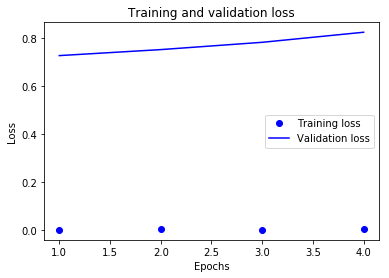

In [18]:
# 绘制训练损失和验证损失
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

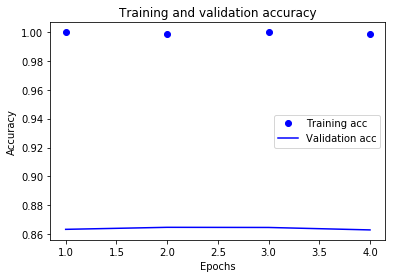

In [19]:
# 绘制训练精度和验证精度
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [20]:
model.predict(x_test)

array([[2.8222557e-03],
       [1.0000000e+00],
       [9.5802778e-01],
       ...,
       [8.9787989e-04],
       [6.0875202e-03],
       [6.8236595e-01]], dtype=float32)